###Calling Package

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Importing Data

In [18]:
df_spotify = pd.read_excel("/content/spotify data.xlsx")
df_spotify.drop(columns=["Unnamed: 8"], inplace=True)
df_spotify.head()

,Track Name,Artist(s) Name,Artist Count,Released,In Spotify Playlists,Streams,Danceability (%),Energy (%)
0,Blinding Lights,The Weeknd,1,2019-11-29,43899,3.703895e+09,50,80
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023-03-16,3090,7.259801e+08,67,76
2,Shape of You,Ed Sheeran,1,2017-01-06,32181,3.562544e+09,83,65
3,TQG,"Karol G, Shakira",2,2023-02-23,4284,6.189904e+08,72,63
4,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023-03-17,2953,5.536341e+08,81,48


In [19]:
print(df_spotify.shape)
print("__________")
df_spotify.info()

(953, 8)
__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Track Name            953 non-null    object        
 1   Artist(s) Name        953 non-null    object        
 2   Artist Count          953 non-null    int64         
 3   Released              953 non-null    datetime64[ns]
 4   In Spotify Playlists  953 non-null    int64         
 5   Streams               952 non-null    float64       
 6   Danceability (%)      953 non-null    int64         
 7   Energy (%)            953 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 59.7+ KB


##Pre-processing Data

In [20]:
df_spotify.isna().sum()

Track Name              0
Artist(s) Name          0
Artist Count            0
Released                0
In Spotify Playlists    0
Streams                 1
Danceability (%)        0
Energy (%)              0
dtype: int64

In [21]:
df_spotify.dropna(subset=['Streams'], how='all', inplace=True)

In [22]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 951
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Track Name            952 non-null    object        
 1   Artist(s) Name        952 non-null    object        
 2   Artist Count          952 non-null    int64         
 3   Released              952 non-null    datetime64[ns]
 4   In Spotify Playlists  952 non-null    int64         
 5   Streams               952 non-null    float64       
 6   Danceability (%)      952 non-null    int64         
 7   Energy (%)            952 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 66.9+ KB


In [23]:
print(f"There are {df_spotify.duplicated().sum()} duplicated data.")

There are 0 duplicated data.


In [24]:
df_spotify = df_spotify.sort_values(by=['Track Name', 'Streams'], ascending=False)

In [25]:
duplicated = df_spotify.duplicated(subset=["Track Name"], keep=False)
df_spotify[duplicated]

,Track Name,Artist(s) Name,Artist Count,Released,In Spotify Playlists,Streams,Danceability (%),Energy (%)
496,Take My Breath,The Weeknd,1,2021-08-06,6392,4.327023e+08,75,74
841,Take My Breath,The Weeknd,1,2021-08-06,2597,1.306558e+08,70,77
602,SPIT IN MY FACE!,ThxSoMch,1,2022-10-31,629,3.032163e+08,73,79
604,SPIT IN MY FACE!,ThxSoMch,1,2022-10-31,573,3.018699e+08,70,57
368,SNAP,Rosa Linn,1,2022-03-19,3202,7.263075e+08,56,64
376,SNAP,Rosa Linn,1,2022-03-19,1818,7.113666e+08,56,64
243,Numb,Linkin Park,1,2003-03-24,20111,1.361425e+09,50,86
613,Numb,"Marshmello, Khalid",2,2022-06-10,3879,2.953070e+08,91,77
461,Miss You,"Robin Schulz, Oliver Tree",2,2022-08-05,5730,4.972253e+08,59,74
808,Miss You,Southstar,1,1982-05-16,2020,1.543570e+08,66,58


In [26]:
duplicated = df_spotify.duplicated(subset=["Track Name","Artist(s) Name"], keep=False)
df_spotify[duplicated]

,Track Name,Artist(s) Name,Artist Count,Released,In Spotify Playlists,Streams,Danceability (%),Energy (%)
496,Take My Breath,The Weeknd,1,2021-08-06,6392,432702334.0,75,74
841,Take My Breath,The Weeknd,1,2021-08-06,2597,130655803.0,70,77
602,SPIT IN MY FACE!,ThxSoMch,1,2022-10-31,629,303216294.0,73,79
604,SPIT IN MY FACE!,ThxSoMch,1,2022-10-31,573,301869854.0,70,57
368,SNAP,Rosa Linn,1,2022-03-19,3202,726307468.0,56,64
376,SNAP,Rosa Linn,1,2022-03-19,1818,711366595.0,56,64
369,About Damn Time,Lizzo,1,2022-07-15,2332,723894473.0,84,74
370,About Damn Time,Lizzo,1,2022-04-14,9021,723894473.0,84,74


In [27]:
df_new = df_spotify.drop_duplicates(subset=['Track Name', 'Artist(s) Name'], keep='first')

In [28]:
df_new.head()

,Track Name,Artist(s) Name,Artist Count,Released,In Spotify Playlists,Streams,Danceability (%),Energy (%)
518,ýýýýýýýýýýýýýýýýýýýýý,Fujii Kaze,1,2020-05-20,685,4.030974e+08,60,76
58,ýýýýýýýýýýýý,YOASOBI,1,2023-04-12,356,1.435738e+08,57,94
307,ýýýabcdefu,Gayle,1,2021-08-13,7215,1.007612e+09,70,54
139,ýýý98 Braves,Morgan Wallen,1,2023-03-03,282,5.653327e+07,49,67
276,you broke me first,Tate McRae,1,2020-04-17,6638,1.180095e+09,64,37


##Analyze Spotify Data

Here we want to answer the Business Problems:

1. What are the key demographic characteristics of artists with top hits?
2. What is the relationship between a song's inclusion in Spotify playlists and its number of streams?
3. Are there specific characteristics (danceability, energy) that are common among the most streamed songs?
4. How does the number of artists on a track (solo vs. collaborations) affect the number of streams?


###1.

What are the key demographic characteristics of artists with top hits?

In [29]:
total_tracks = df_new["Track Name"].count()
total_tracks

948

Total lagu yang ada di data kategori most streamed in 2023 sebanyak 948 lagu

In [30]:
total_artist = pd.DataFrame(df_new['Artist(s) Name'].unique())
total = total_artist.count()
total_artist.rename(columns={0: 'Artist'}, inplace=True)
total_artist.count()

Artist    644
dtype: int64

In [31]:
group = df_new.groupby("Artist(s) Name").agg(
    Total_Tracks = ('Track Name', 'count')).sort_values(by="Total_Tracks", ascending=False).head(5)

group

,Total_Tracks
Artist(s) Name,
Taylor Swift,34
The Weeknd,21
SZA,19
Bad Bunny,19
Harry Styles,17


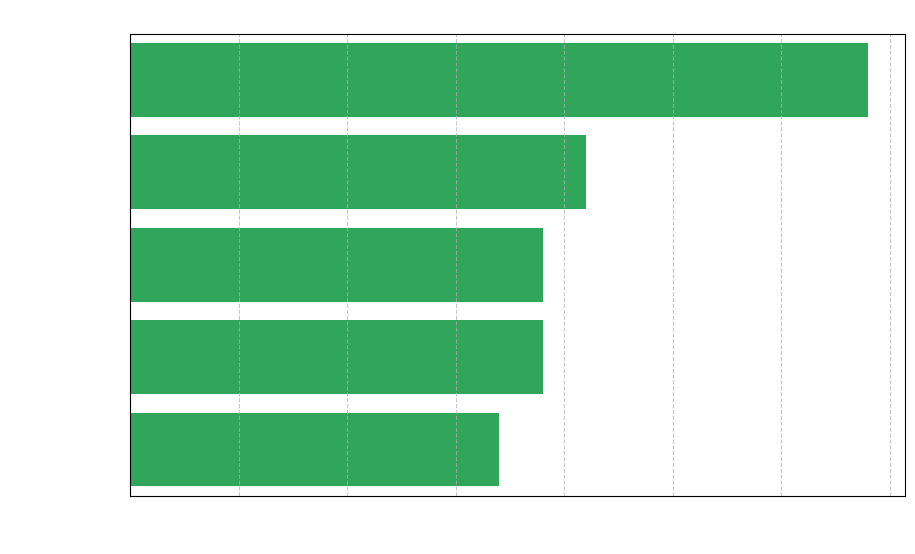

In [32]:
spotify_green = '#1DB954'
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Tracks', y='Artist(s) Name', data=group, color=spotify_green)

# Customize the plot
plt.title('Total Tracks by Artist', fontsize=16, color="white")
plt.xlabel('Total Tracks', fontsize=14, color="white")
plt.ylabel('Artist(s) Name', fontsize=14, color="white")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Customize colors for axes
plt.gca().tick_params(axis='x', colors="white")
plt.gca().tick_params(axis='y', colors="white")

# Set the background to transparent
plt.gcf().patch.set_alpha(0)
plt.gca().patch.set_alpha(0)

# Show the plot
plt.show()

Berikut merupakan daftar artis yang memiliki lagu most streamed paling banyak di tahun 2023, mulai dari Taylor Swift hingga Harry Styles

In [33]:
import sqlite3

In [34]:
conn = sqlite3.connect('spotify.db')
cursor = conn.cursor()

In [35]:
df_new.to_sql("Spotify", conn)

948

In [36]:
pd.set_option('display.float_format', '{:.0f}'.format)
pd.options.display.float_format = '{:,.0f}'.format

In [37]:
query = """
SELECT "Artist(s) Name", SUM(Streams) AS "Total Streams"
FROM Spotify
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,Artist(s) Name,Total Streams
0,The Weeknd,"14,054,897,067"
1,Taylor Swift,"14,053,658,300"
2,Ed Sheeran,"13,908,947,204"
3,Harry Styles,"11,608,645,649"
4,Bad Bunny,"9,997,799,607"


In [38]:
query = """
SELECT "Artist(s) Name", "Track Name", (Streams) AS "Total Streams"
FROM Spotify
WHERE "Artist(s) Name" IN ("The Weeknd")
ORDER BY 3 DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,Artist(s) Name,Track Name,Total Streams
0,The Weeknd,Blinding Lights,"3,703,895,074"
1,The Weeknd,The Hills,"1,947,371,785"
2,The Weeknd,Die For You,"1,647,990,401"
3,The Weeknd,Save Your Tears,"1,591,223,784"
4,The Weeknd,Call Out My Name,"1,449,799,467"


In [39]:
query = """
SELECT "Artist(s) Name", "Track Name", (Streams) AS "Total Streams"
FROM Spotify
WHERE "Artist(s) Name" IN ("Taylor Swift")
ORDER BY 3 DESC
"""
pd.read_sql(query, conn)

,Artist(s) Name,Track Name,Total Streams
0,Taylor Swift,Blank Space,"1,355,959,075"
1,Taylor Swift,Shake It Off,"1,113,838,873"
2,Taylor Swift,Anti-Hero,"999,748,277"
3,Taylor Swift,Lover,"882,831,184"
4,Taylor Swift,cardigan,"812,019,557"
5,Taylor Swift,Cruel Summer,"800,840,817"
6,Taylor Swift,Style,"786,181,836"
7,Taylor Swift,Donï¿½ï¿½ï¿½t Bl,"685,032,533"
8,Taylor Swift,Enchanted,"621,660,989"
9,Taylor Swift,august,"607,123,776"


In [40]:
query = """
SELECT "Artist(s) Name", "Track Name", MAX(Streams) AS "Total Streams"
FROM Spotify
GROUP BY "Track Name"
ORDER BY MAX(Streams) DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,Artist(s) Name,Track Name,Total Streams
0,The Weeknd,Blinding Lights,"3,703,895,074"
1,Ed Sheeran,Shape of You,"3,562,543,890"
2,Lewis Capaldi,Someone You Loved,"2,887,241,814"
3,Tones and I,Dance Monkey,"2,864,791,672"
4,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,"2,808,096,550"


In [41]:
df_new.groupby("Artist(s) Name").agg(
    Total_Spotify_Playlist = ('In Spotify Playlists', 'sum')).sort_values(by="Total_Spotify_Playlist", ascending=False).head(5)

,Total_Spotify_Playlist
Artist(s) Name,
The Weeknd,141456
Taylor Swift,132974
Ed Sheeran,128758
Harry Styles,110026
Eminem,87331


In [42]:
query = """
SELECT "Artist(s) Name", SUM("In Spotify Playlists") AS "Total Spotify Playlists"
FROM Spotify
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,Artist(s) Name,Total Spotify Playlists
0,The Weeknd,141456
1,Taylor Swift,132974
2,Ed Sheeran,128758
3,Harry Styles,110026
4,Eminem,87331


In [43]:
query = """
SELECT "Artist(s) Name", "Track Name", ("In Spotify Playlists") AS "In Spotify Playlists"
FROM Spotify
WHERE "Artist(s) Name" IN ("Taylor Swift")
ORDER BY 3 DESC
"""
pd.read_sql(query, conn)

,Artist(s) Name,Track Name,In Spotify Playlists
0,Taylor Swift,Shake It Off,21335
1,Taylor Swift,Blank Space,11434
2,Taylor Swift,Anti-Hero,9082
3,Taylor Swift,Lover,8448
4,Taylor Swift,cardigan,7923
5,Taylor Swift,Cruel Summer,7858
6,Taylor Swift,Style,7830
7,Taylor Swift,august,7324
8,Taylor Swift,Donï¿½ï¿½ï¿½t Bl,4875
9,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,4635


In [44]:
query = """
SELECT  AVG("In Spotify Playlists") AS "AVG In Spotify Playlists"
FROM Spotify
"""
pd.read_sql(query, conn)

,AVG In Spotify Playlists
0,"5,210"


In [45]:
query = """
SELECT  AVG("Streams") AS "AVG Streams"
FROM Spotify
"""
pd.read_sql(query, conn)

,AVG Streams
0,"514,336,542"


In [46]:
query = """
SELECT "Track Name", "Artist(s) Name", ("In Spotify Playlists") AS "In Spotify Playlists"
FROM Spotify
GROUP BY "Artist(s) Name","Track Name"
ORDER BY 3 DESC
LIMIT 10;
"""
pd.read_sql(query, conn)

,Track Name,Artist(s) Name,In Spotify Playlists
0,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898
1,Mr. Brightside,The Killers,51979
2,Wake Me Up - Radio Edit,Avicii,50887
3,Smells Like Teen Spirit - Remastered 2021,Nirvana,49991
4,Take On Me,a-ha,44927
5,Blinding Lights,The Weeknd,43899
6,One Dance,"Drake, WizKid, Kyla",43257
7,Somebody That I Used To Know,"Gotye, Kimbra",42798
8,Everybody Wants To Rule The World,Tears For Fears,41751
9,Sweet Child O' Mine,Guns N' Roses,41231


In [47]:
query = """
SELECT "Artist(s) Name", AVG("In Spotify Playlists") AS "In Spotify Playlists"
FROM Spotify
GROUP BY "Artist(s) Name"
ORDER BY 2 DESC
LIMIT 10;
"""
pd.read_sql(query, conn)

,Artist(s) Name,In Spotify Playlists
0,"Pharrell Williams, Nile Rodgers, Daft Punk","52,898"
1,The Killers,"51,979"
2,a-ha,"44,927"
3,"Drake, WizKid, Kyla","43,257"
4,"Gotye, Kimbra","42,798"
5,Tears For Fears,"41,751"
6,Guns N' Roses,"41,231"
7,Queen,"40,112"
8,"Rihanna, Calvin Harris","36,843"
9,Radiohead,"36,724"


In [48]:
query = """
SELECT  AVG("Danceability (%)") AS "AVG of Danceability (%)"
FROM Spotify
"""
pd.read_sql(query, conn)

,AVG of Danceability (%)
0,67


In [49]:
query = """
SELECT  AVG("Energy (%)") AS "AVG of Energy (%)"
FROM Spotify
"""
pd.read_sql(query, conn)

,AVG of Energy (%)
0,64


In [50]:
query = """
SELECT "Artist(s) Name", AVG("Danceability (%)") AS "AVG of Danceability (%)",
  AVG("Energy (%)") AS "AVG of Energy (%)",AVG(Streams) AS "AVG of Streams"
FROM Spotify
GROUP BY "Artist(s) Name"
ORDER BY 4 DESC
LIMIT 10
"""
pd.read_sql(query, conn)

,Artist(s) Name,AVG of Danceability (%),AVG of Energy (%),AVG of Streams
0,Tones and I,82,59,"2,864,791,672"
1,"Post Malone, Swae Lee",76,50,"2,808,096,550"
2,"Drake, WizKid, Kyla",77,63,"2,713,922,350"
3,"Justin Bieber, The Kid Laroi",59,76,"2,665,343,922"
4,"The Chainsmokers, Halsey",75,52,"2,591,224,264"
5,"The Weeknd, Daft Punk",68,59,"2,565,529,693"
6,Glass Animals,76,53,"2,557,975,762"
7,"Shawn Mendes, Camila Cabello",76,52,"2,484,812,918"
8,"Billie Eilish, Khalid",35,30,"2,355,719,893"
9,"The Chainsmokers, Coldplay",61,65,"2,204,080,728"


In [51]:
query = """
SELECT "Artist(s) Name", AVG("Energy (%)") AS "AVG of Energy (%)", AVG(Streams) AS "AVG of Streams"
FROM Spotify
GROUP BY "Artist(s) Name"
ORDER BY 3 DESC
LIMIT 10
"""
pd.read_sql(query, conn)

,Artist(s) Name,AVG of Energy (%),AVG of Streams
0,Tones and I,59,"2,864,791,672"
1,"Post Malone, Swae Lee",50,"2,808,096,550"
2,"Drake, WizKid, Kyla",63,"2,713,922,350"
3,"Justin Bieber, The Kid Laroi",76,"2,665,343,922"
4,"The Chainsmokers, Halsey",52,"2,591,224,264"
5,"The Weeknd, Daft Punk",59,"2,565,529,693"
6,Glass Animals,53,"2,557,975,762"
7,"Shawn Mendes, Camila Cabello",52,"2,484,812,918"
8,"Billie Eilish, Khalid",30,"2,355,719,893"
9,"The Chainsmokers, Coldplay",65,"2,204,080,728"


In [52]:
query = """
SELECT STRFTIME("%Y-%m", Released) AS "Released Date", COUNT("Track Name") AS "Total Tracks"
FROM Spotify
WHERE STRFTIME("%Y-%m", Released) >= '2020-01'
GROUP BY STRFTIME("%Y-%m", Released)
ORDER BY 1 DESC
"""

time_series = pd.read_sql(query, conn)

In [53]:
time_series['Released Date'] = pd.to_datetime(time_series['Released Date'])
# Set 'Date' sebagai index
time_series.set_index('Released Date', inplace=True)

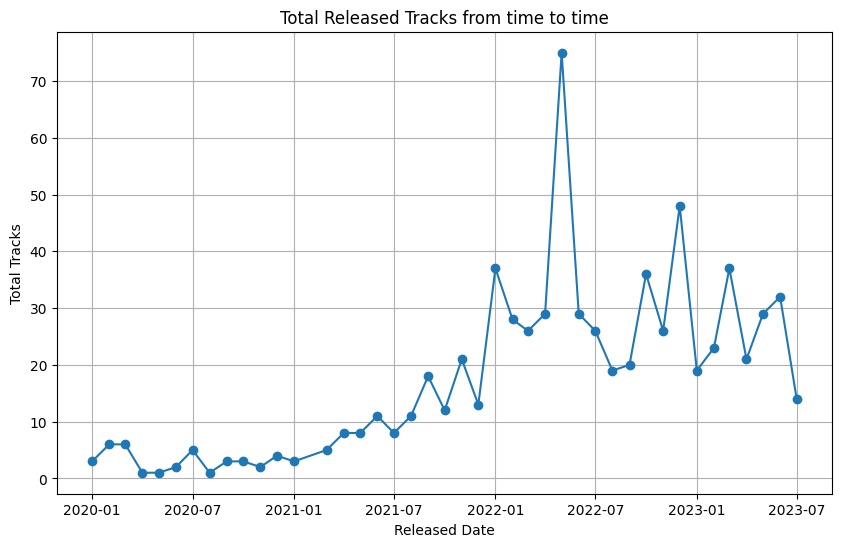

In [54]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series['Total Tracks'], marker='o', linestyle='-')
plt.title('Total Released Tracks from time to time')
plt.xlabel('Released Date')
plt.ylabel('Total Tracks')
plt.grid(True)

# Format y-axis with commas
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

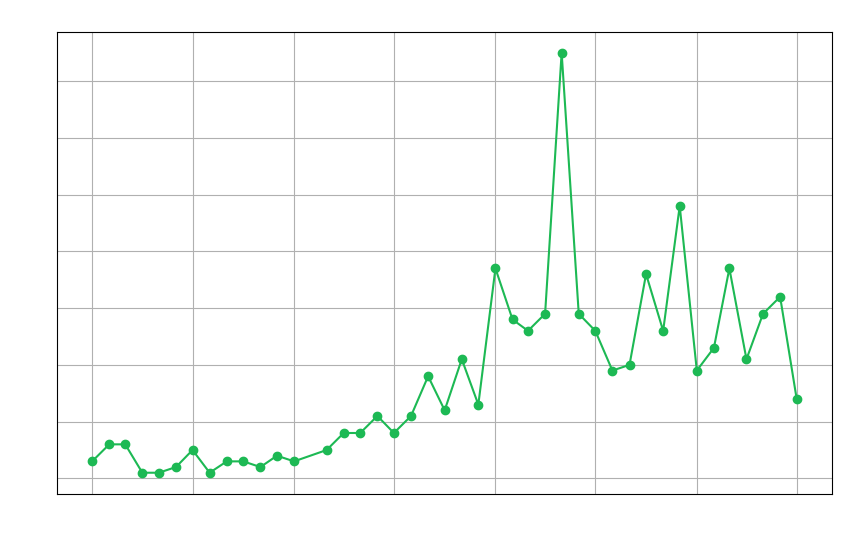

In [55]:
# Spotify color palette
spotify_green = '#1DB954'
spotify_black = '#191414'

# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series['Total Tracks'], marker='o', linestyle='-', color=spotify_green)
plt.title('Total Released Tracks from time to time', color="white")
plt.xlabel('Released Date', color="white")
plt.ylabel('Total Tracks', color="white")
plt.grid(True)

# Format y-axis with commas
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Customize colors for axes
plt.gca().tick_params(axis='x', colors="white")
plt.gca().tick_params(axis='y', colors="white")

# Set the background to transparent
plt.gcf().patch.set_alpha(0)
plt.gca().patch.set_alpha(0)

plt.show()

###2.

What is the relationship between a song's inclusion in Spotify playlists and its number of streams?

In [56]:
df_new.head()

,Track Name,Artist(s) Name,Artist Count,Released,In Spotify Playlists,Streams,Danceability (%),Energy (%)
518,ýýýýýýýýýýýýýýýýýýýýý,Fujii Kaze,1,2020-05-20,685,"403,097,450",60,76
58,ýýýýýýýýýýýý,YOASOBI,1,2023-04-12,356,"143,573,775",57,94
307,ýýýabcdefu,Gayle,1,2021-08-13,7215,"1,007,612,429",70,54
139,ýýý98 Braves,Morgan Wallen,1,2023-03-03,282,"56,533,272",49,67
276,you broke me first,Tate McRae,1,2020-04-17,6638,"1,180,094,974",64,37


In [57]:
from scipy.stats import spearmanr

In [58]:
corr, p_value = spearmanr(df_new['In Spotify Playlists'], df_new['Streams'])
print(f"Spearman correlation coefficient: {round(corr, ndigits=2)}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant correlation between In Spotify Playlists and streams.")
else:
    print("There is no significant correlation between In Spotify Playlists and streams.")

Spearman correlation coefficient: 0.83
P-value: 4.0517738873332784e-246
There is a significant correlation between In Spotify Playlists and streams.


###3.

Are there specific characteristics (danceability, energy) that are common among the most streamed songs?

For answering this question, the steps I'm gonna do are:
1. See the correlation for all of data per variable
2. Calculate the median number of streams.
3. Filter the data to include only the songs with streams above the median.
4. Perform descriptive analysis on the (especially from danceability and energy columns) for the filtered data.

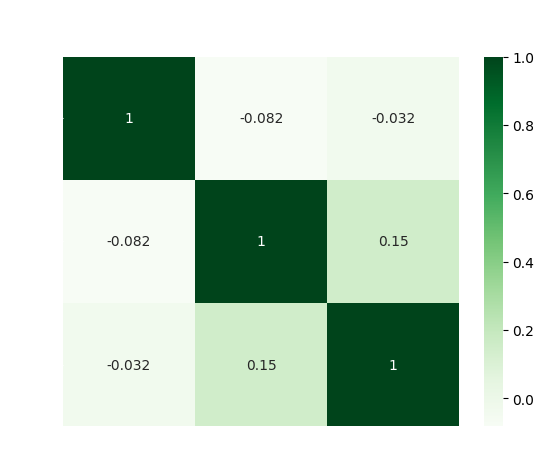

In [81]:
spotify_green = '#1DB954'
heatmap_data = df_new[['Streams', 'Danceability (%)', 'Energy (%)']]
sns.heatmap(data = heatmap_data.corr(method ='spearman'), annot=True, cmap='Greens', color= "white")


# Customize colors for axes
plt.gca().tick_params(axis='x', colors="white")
plt.gca().tick_params(axis='y', colors="white")
plt.title('Heatmap of Danceability (%) and Energy (%)\n for the Most Streamed Songs', fontsize=16, color="white")

# Set the background to transparent
plt.gcf().patch.set_alpha(0)
plt.gca().patch.set_alpha(0)

# Show the plot
plt.show()

In [61]:
round(df_new['Streams'].median())

289165138

In [62]:
query = """
SELECT *
FROM Spotify
WHERE Streams > 289165138
ORDER BY Streams DESC
"""
upper_median = pd.read_sql(query, conn)

In [63]:
upper_median.describe()

,index,Artist Count,In Spotify Playlists,Streams,Danceability (%),Energy (%)
count,474,474,474,474,474,474
mean,373,1,"9,124","882,507,260",66,64
std,154,1,"9,655","607,021,130",15,16
min,0,1,168,"290,228,626",23,15
25%,262,1,"2,953","418,182,966",56,53
50%,382,1,"5,400","673,228,688",68,65
75%,501,2,"11,830","1,195,830,450",77,76
max,620,7,"52,898","3,703,895,074",95,97


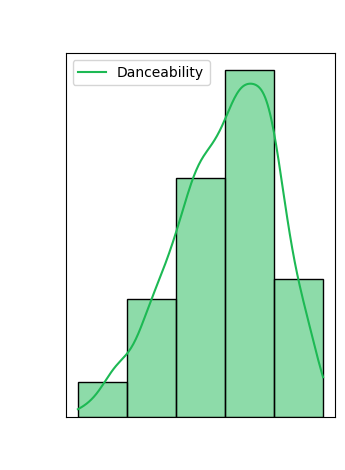

In [88]:
# Create a histogram for danceability
spotify_green = '#1DB954'
plt.subplot(1, 2, 2)
sns.histplot(df_new['Danceability (%)'], kde=True, bins=5, color=spotify_green)
plt.title('Histogram of Danceability (%) \nfor the Most Streamed Songs', color="white")
plt.xlabel('Percentage', color="white")
plt.ylabel('Count of Song', color="white")
plt.legend(['Danceability'])
plt.gca().tick_params(axis='x', colors="white")
plt.gca().tick_params(axis='y', colors="white")

# Set the background to transparent
plt.gcf().patch.set_alpha(0)
plt.gca().patch.set_alpha(0)

plt.tight_layout()
plt.show()

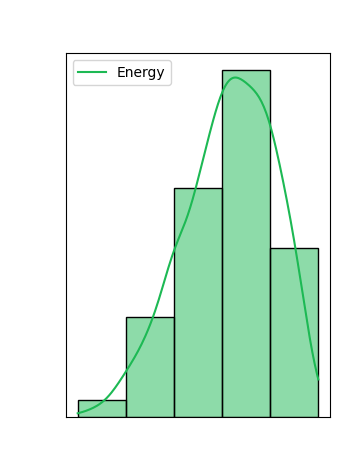

In [89]:
# Create a histogram for Energy
spotify_green = '#1DB954'
plt.subplot(1, 2, 2)
sns.histplot(df_new['Energy (%)'], kde=True, bins=5, color=spotify_green)
plt.title('Histogram of Energy (%) \nfor the Most Streamed Songs', color="white")
plt.xlabel('Percentage', color="white")
plt.ylabel('Count of Song', color="white")
plt.legend(['Energy'])
plt.gca().tick_params(axis='x', colors="white")
plt.gca().tick_params(axis='y', colors="white")

# Set the background to transparent
plt.gcf().patch.set_alpha(0)
plt.gca().patch.set_alpha(0)

plt.tight_layout()
plt.show()

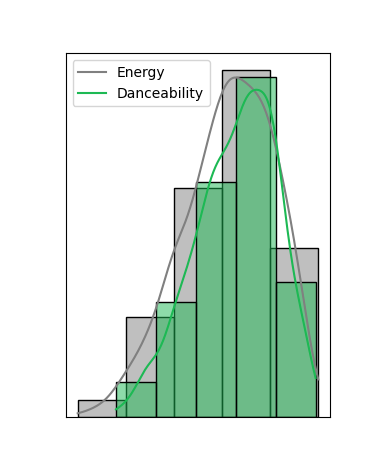

In [95]:
# Create a histogram for Energy and Danceability
spotify_green = '#1DB954'
plt.subplot(1, 2, 2)
sns.histplot(df_new['Energy (%)'], kde=True, bins=5, color="grey")
sns.histplot(df_new['Danceability (%)'], kde=True, bins=5, color=spotify_green)
plt.title('Histogram of Energy and Danceability(%) \nfor the Most Streamed Songs', color="white")
plt.xlabel('Percentage', color="white")
plt.ylabel('Count of Song', color="white")
plt.legend(['Energy', 'Danceability'])
plt.gca().tick_params(axis='x', colors="white")
plt.gca().tick_params(axis='y', colors="white")

# Set the background to transparent
plt.gcf().patch.set_alpha(0)
plt.gca().patch.set_alpha(0)

plt.tight_layout()
plt.show()

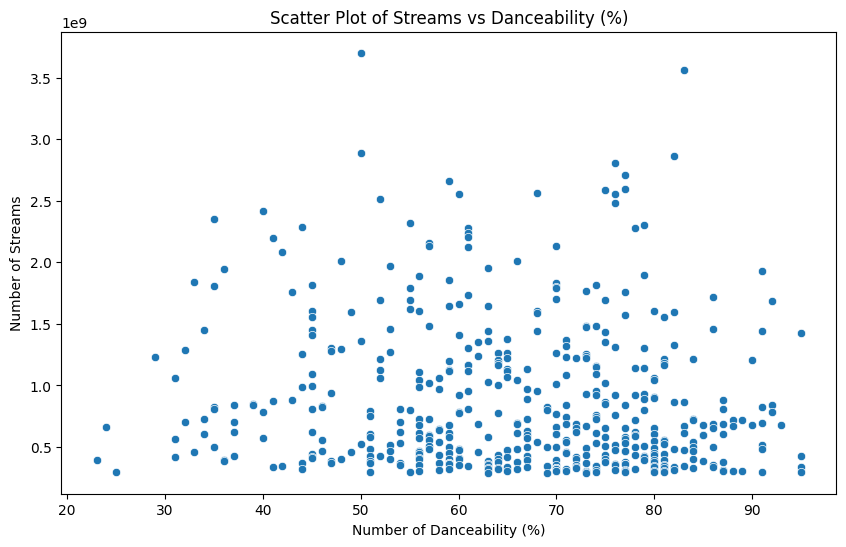

In [67]:
# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=upper_median, x='Danceability (%)', y='Streams')

# Add title and labels
plt.title('Scatter Plot of Streams vs Danceability (%)')
plt.xlabel('Number of Danceability (%)')
plt.ylabel('Number of Streams')

# Show the plot
plt.show()

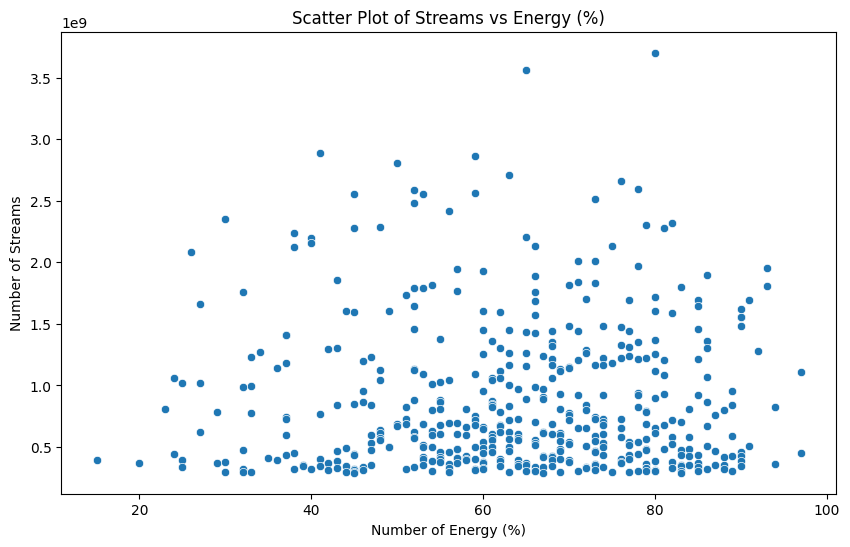

In [68]:
# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=upper_median, x='Energy (%)', y='Streams')

# Add title and labels
plt.title('Scatter Plot of Streams vs Energy (%)')
plt.xlabel('Number of Energy (%)')
plt.ylabel('Number of Streams')

# Show the plot
plt.show()

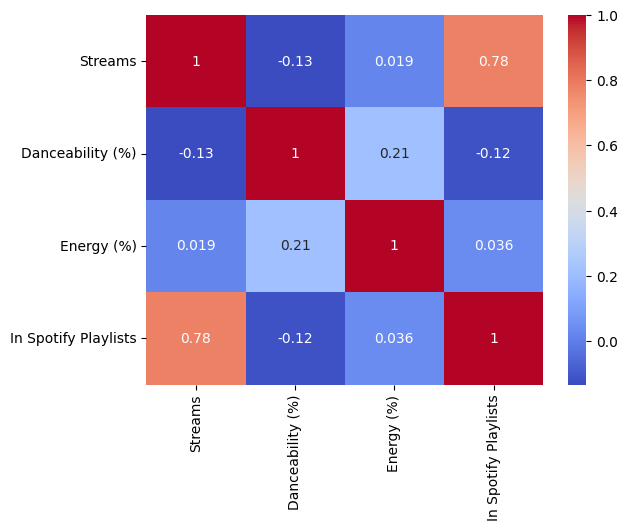

In [69]:
heatmap_data = upper_median[['Streams', 'Danceability (%)', 'Energy (%)', 'In Spotify Playlists']]
sns.heatmap(data = heatmap_data.corr(method ='spearman'), annot=True, cmap='coolwarm')
plt.show()

In [70]:
corr, p_value = spearmanr(upper_median['Energy (%)'], upper_median['Streams'])
print(f"Spearman correlation coefficient: {corr})")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant correlation between Energy (%) and streams.")
else:
    print("There is no significant correlation between Energy (%) and streams.")

Spearman correlation coefficient: 0.018928477816211098)
P-value: 0.6810352322709199
There is no significant correlation between Energy (%) and streams.


In [71]:
corr, p_value = spearmanr(upper_median['Danceability (%)'], upper_median['Streams'])
print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant correlation between Danceability (%) and streams.")
else:
    print("There is no significant correlation between Danceability (%) and streams.")

Spearman correlation coefficient: -0.13380825708140148
P-value: 0.00351544282783121
There is a significant correlation between Danceability (%) and streams.


###4.

How does the number of artists on a track (solo vs. collaborations) affect the number of streams?

In [72]:
query = """
SELECT
  CASE WHEN "Artist Count" == 1 THEN "Solo"
  WHEN "Artist Count" == 2 THEN "Duet"
  ELSE "Big Collaboration"
  END AS "Category",
  COUNT("Artist(s) Name") AS "Total"
FROM Spotify
GROUP BY "Category"
ORDER BY 2 DESC
"""
proporsi = pd.read_sql(query, conn)
proporsi

,Category,Total
0,Solo,582
1,Duet,254
2,Big Collaboration,112


<Axes: ylabel='Total'>

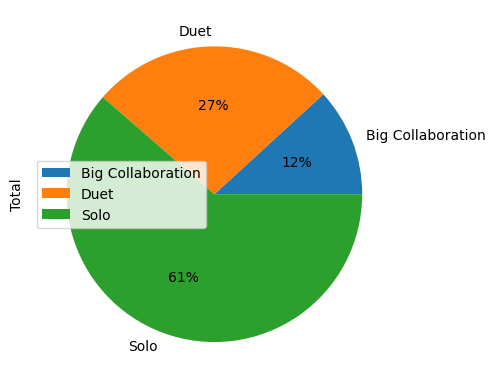

In [73]:
proporsi.groupby(['Category']).sum().plot(
    kind='pie', y='Total', autopct='%1.0f%%')

In [74]:
corr, p_value = spearmanr(df_new['Artist Count'], df_new['Streams'])
print(f"Spearman correlation coefficient: {corr})")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant correlation between Artist Counts and streams.")
else:
    print("There is no significant correlation between Artist Counts and streams.")

Spearman correlation coefficient: -0.15493641467930272)
P-value: 1.64216175284144e-06
There is a significant correlation between Artist Counts and streams.
